# Impact of Food on Health of India - Exploratory Data Analysis Python

The Food Impact on Indians dataset contains 17,686 rows and 16 columns, providing insights into how different food habits influence the health and lifestyle of individuals in India. The dataset captures details like age, region, diet type, cuisine preferences, calorie intake, and health outcomes

```
# This is formatted as code
```



In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/food_impact_india.csv'
data = pd.read_csv(file_path)

In [ ]:
# 1. Dataset Overview
print("Dataset Shape:", data.shape)
print("\nDataset Columns:\n", data.columns)
data.head()


Dataset Shape: (17686, 16)

Dataset Columns:
 Index(['Person_ID', 'Age', 'Gender', 'Region', 'Diet_Type', 'Primary_Cuisine',
       'Spice_Level', 'Daily_Calorie_Intake', 'Health_Impact',
       'Common_Diseases', 'Exercise_Level', 'BMI', 'Food_Frequency',
       'Sugar_Intake', 'Salt_Intake', 'Health_Score'],
      dtype='object')


,Person_ID,Age,Gender,Region,Diet_Type,Primary_Cuisine,Spice_Level,Daily_Calorie_Intake,Health_Impact,Common_Diseases,Exercise_Level,BMI,Food_Frequency,Sugar_Intake,Salt_Intake,Health_Score
0,1,56,Female,East,Vegetarian,Gujarati,High,2768,Positive,Diabetes,Sedentary,37.3,5,Low,High,30
1,2,69,Male,Central,Vegetarian,North Indian,Low,3005,Positive,Obesity,Moderate,38.4,3,Low,Moderate,95
2,3,46,Male,South,Vegetarian,Maharashtrian,Medium,3416,Positive,Diabetes,Sedentary,19.6,4,High,Low,86
3,4,32,Female,West,Vegan,North Indian,Medium,1572,Neutral,NaN,Moderate,32.5,5,Low,Low,81
4,5,60,Male,East,Non-Vegetarian,Gujarati,Medium,2539,Negative,Diabetes,Moderate,30.4,4,High,Moderate,37


In [ ]:
data.dtypes

,0
Person_ID,int64
Age,int64
Gender,object
Region,object
Diet_Type,object
Primary_Cuisine,object
Spice_Level,object
Daily_Calorie_Intake,int64
Health_Impact,object
Common_Diseases,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Person_ID             17686 non-null  int64  
 1   Age                   17686 non-null  int64  
 2   Gender                17686 non-null  object 
 3   Region                17686 non-null  object 
 4   Diet_Type             17686 non-null  object 
 5   Primary_Cuisine       17686 non-null  object 
 6   Spice_Level           17686 non-null  object 
 7   Daily_Calorie_Intake  17686 non-null  int64  
 8   Health_Impact         17686 non-null  object 
 9   Common_Diseases       7037 non-null   object 
 10  Exercise_Level        17686 non-null  object 
 11  BMI                   17686 non-null  float64
 12  Food_Frequency        17686 non-null  int64  
 13  Sugar_Intake          17686 non-null  object 
 14  Salt_Intake           17686 non-null  object 
 15  Health_Score       

In [ ]:
df = data

In [ ]:
desc = df.describe()

In [ ]:
desc

,Person_ID,Age,Daily_Calorie_Intake,BMI,Food_Frequency,Health_Score
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,8843.500000,43.477949,2359.039184,29.280080,3.523069,50.711071
std,5105.652766,14.925590,659.713868,6.188532,1.703098,28.748094
min,1.000000,18.000000,1200.000000,18.500000,1.000000,1.000000
25%,4422.250000,31.000000,1791.000000,24.000000,2.000000,26.000000
50%,8843.500000,43.000000,2368.000000,29.300000,4.000000,51.000000
75%,13264.750000,56.000000,2929.000000,34.600000,5.000000,76.000000
max,17686.000000,69.000000,3500.000000,40.000000,6.000000,100.000000


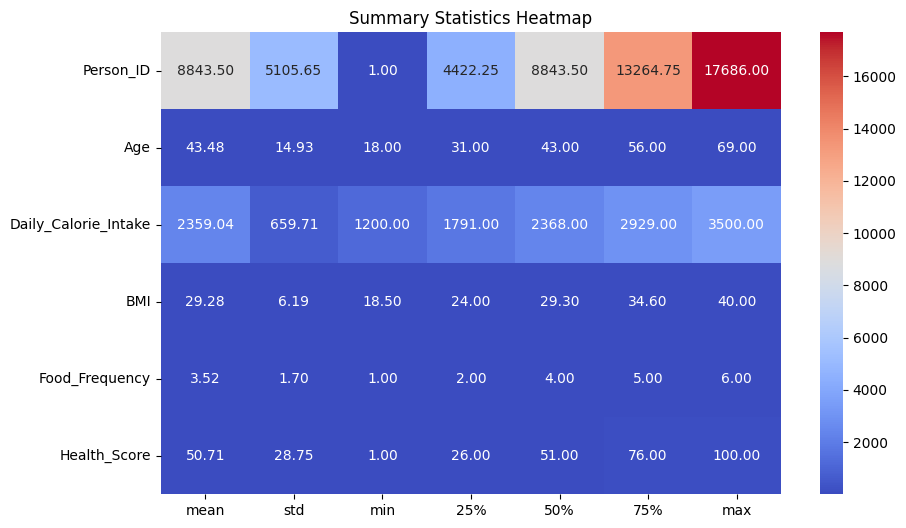

In [ ]:
desc = df.describe().T
plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Summary Statistics Heatmap')
plt.show()

<Axes: ylabel='Frequency'>

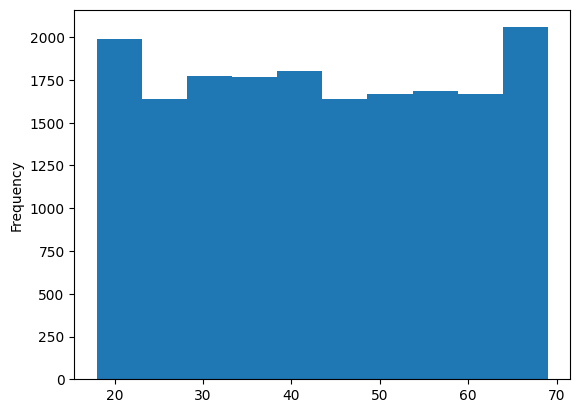

In [ ]:
df.Age.plot(kind='hist')

<Axes: xlabel='Age', ylabel='Count'>

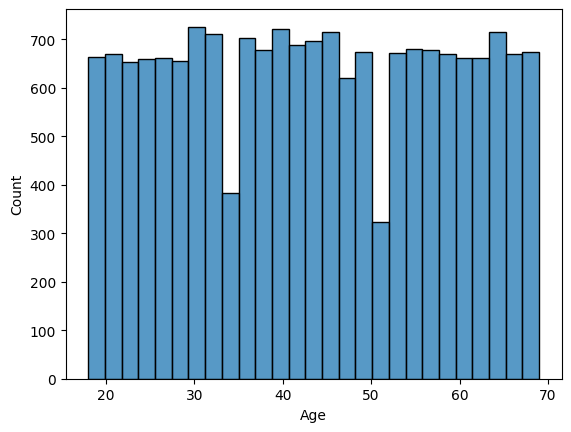

In [ ]:
#seaborn histogram
sns.histplot(df.Age)

In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=["0-18", "19-35", "36-50", "51+"])

In [ ]:
df.Age_Group.value_counts()

,count
Age_Group,
51+,6405
19-35,5818
36-50,5144
0-18,319


In [ ]:
common_diseases_by_age = df.groupby('Age_Group')['Common_Diseases'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
#explain this

<ipython-input-25-f24548eb4246>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  common_diseases_by_age = df.groupby('Age_Group')['Common_Diseases'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)



This line of code groups the DataFrame `df` by the 'Age_Group' column and then finds the most common (mode) value within the 'Common_Diseases' column for each age group.  Let's break it down:

1. **`df.groupby('Age_Group')`**: This groups the rows of the DataFrame `df` based on the unique values in the 'Age_Group' column.  So, all rows with the same age group are now considered together as a single group.

2. **`['Common_Diseases']`**:  This selects the 'Common_Diseases' column from each of these groups.

3. **`.agg(lambda x: ...)`**: This applies a custom aggregation function to the 'Common_Diseases' column within each age group.  The aggregation function is defined using a lambda function.

4. **`x.mode()[0]`**: Inside the lambda function, `x` represents a Series containing the values of the 'Common_Diseases' column for a specific age group.  `x.mode()` calculates the mode (most frequent value) of this Series.  `[0]` then selects the *first* element of the mode result.  If there are multiple modes with the same frequency, it only takes the first one.

5. **`if not x.mode().empty else None`**: This part handles cases where there is no mode, e.g., if all values in a given age group's 'Common_Diseases' column are unique.  `x.mode().empty` checks if the `mode()` operation returned an empty Series.  If it's empty (no mode found), the result is `None`; otherwise, the first mode is returned.


In essence, this code snippet calculates the most prevalent disease for each age group in the dataset.  If a disease is equally frequent as other disease(s) within the same age group, then the code returns only the first occurrence of that disease.  If no disease is prevalent in a specific age group, it returns `None`.  The result is stored in the `common_diseases_by_age` variable.


In [ ]:
common_diseases_by_age

,Common_Diseases
Age_Group,
0-18,Diabetes
19-35,Diabetes
36-50,Diabetes
51+,Diabetes


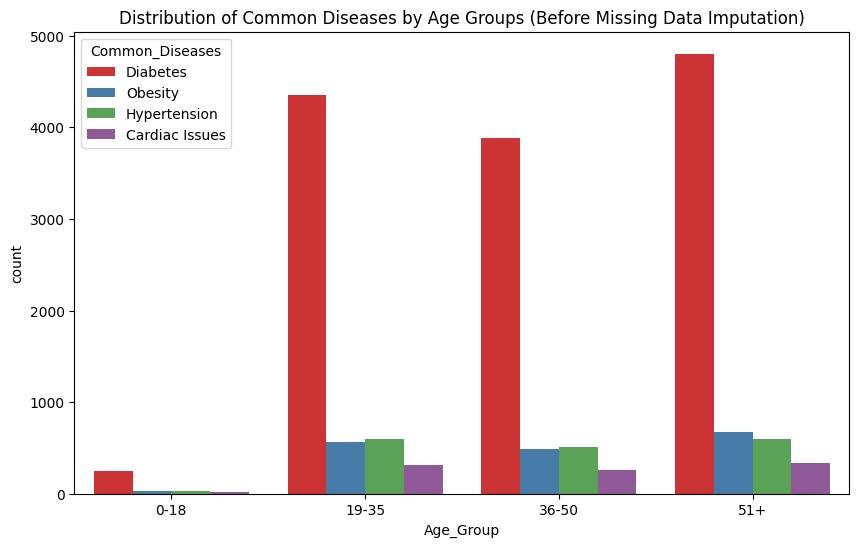

In [ ]:
def fill_common_diseases(row):
    if pd.isnull(row['Common_Diseases']):
        return common_diseases_by_age[row['Age_Group']]
    return row['Common_Diseases']

df['Common_Diseases'] = df.apply(fill_common_diseases, axis=1)

plt.figure(figsize=(10, 6))

sns.countplot(x='Age_Group', hue='Common_Diseases', data=df, palette="Set1")
plt.title('Distribution of Common Diseases by Age Groups (Before Missing Data Imputation)')

plt.show()

In [ ]:
# Categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender', 'Region', 'Diet_Type', 'Primary_Cuisine', 'Spice_Level',
       'Health_Impact', 'Common_Diseases', 'Exercise_Level', 'Sugar_Intake',
       'Salt_Intake'],
      dtype='object')

In [ ]:
# Value counts for categorical columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", data[col].value_counts())


Value Counts for Gender:
 Gender
Female        8522
Male          8422
Non-Binary     742
Name: count, dtype: int64

Value Counts for Region:
 Region
West       3586
South      3576
Central    3516
North      3509
East       3499
Name: count, dtype: int64

Value Counts for Diet_Type:
 Diet_Type
Vegetarian        9629
Non-Vegetarian    7187
Vegan              870
Name: count, dtype: int64

Value Counts for Primary_Cuisine:
 Primary_Cuisine
South Indian     2575
Rajasthani       2575
North Indian     2541
Maharashtrian    2535
Bengali          2498
Punjabi          2484
Gujarati         2478
Name: count, dtype: int64

Value Counts for Spice_Level:
 Spice_Level
Medium    8768
High      4506
Low       4412
Name: count, dtype: int64

Value Counts for Health_Impact:
 Health_Impact
Neutral     7868
Positive    6191
Negative    3627
Name: count, dtype: int64

Value Counts for Common_Diseases:
 Common_Diseases
Diabetes          13288
Obesity            1750
Hypertension       1734
Cardiac Issu

<ipython-input-32-dcf1bad2b0ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")


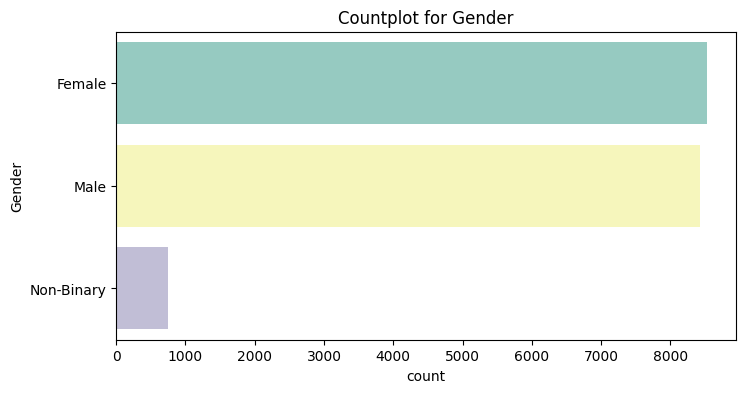

<ipython-input-32-dcf1bad2b0ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")


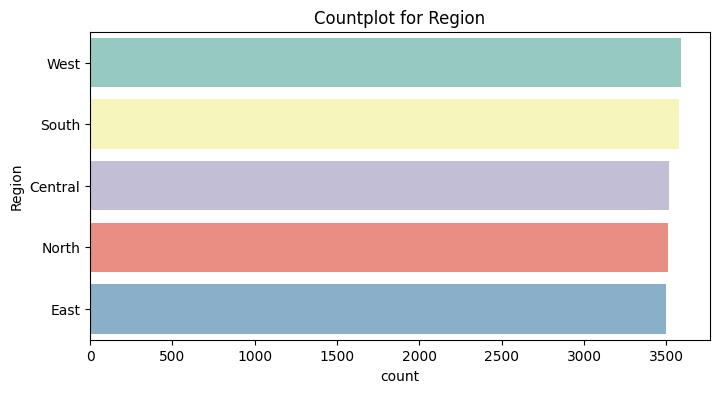

<ipython-input-32-dcf1bad2b0ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")


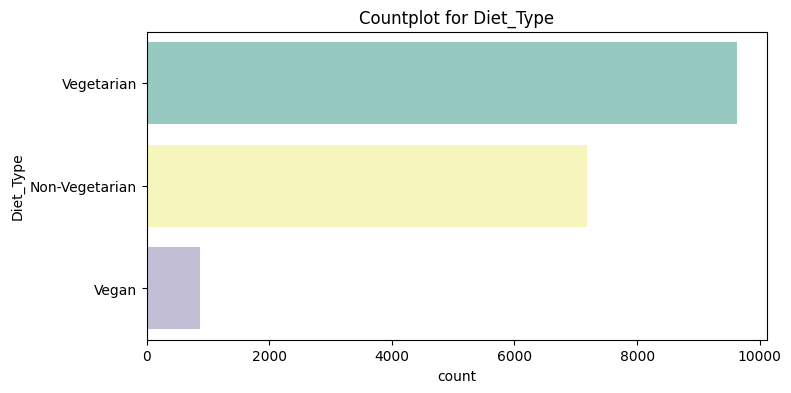

<ipython-input-32-dcf1bad2b0ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")


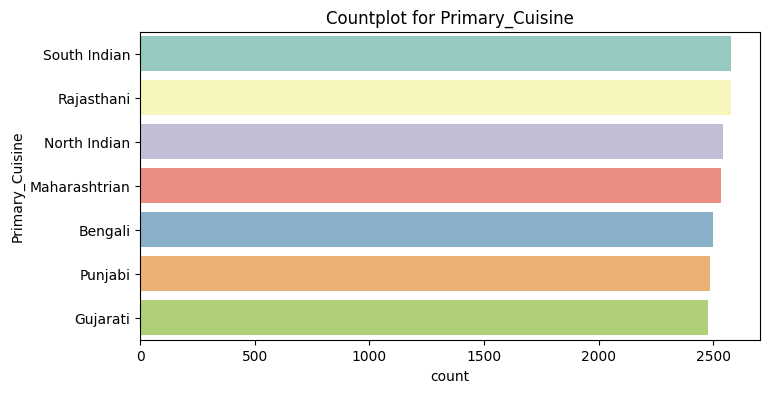

<ipython-input-32-dcf1bad2b0ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")


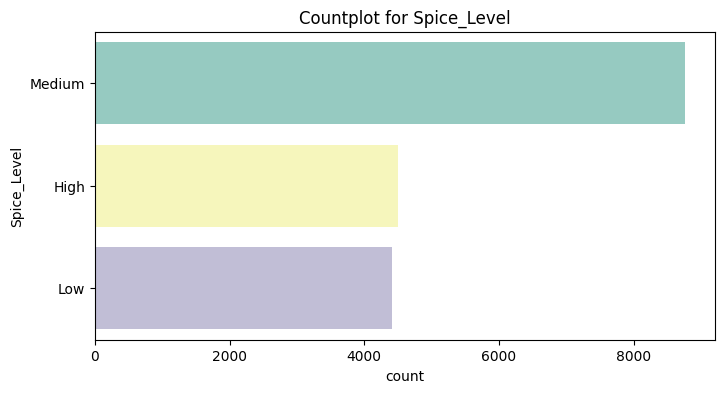

<ipython-input-32-dcf1bad2b0ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")


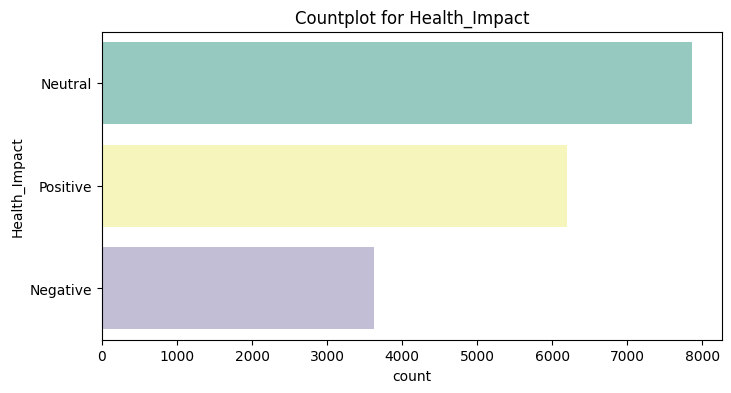

<ipython-input-32-dcf1bad2b0ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")


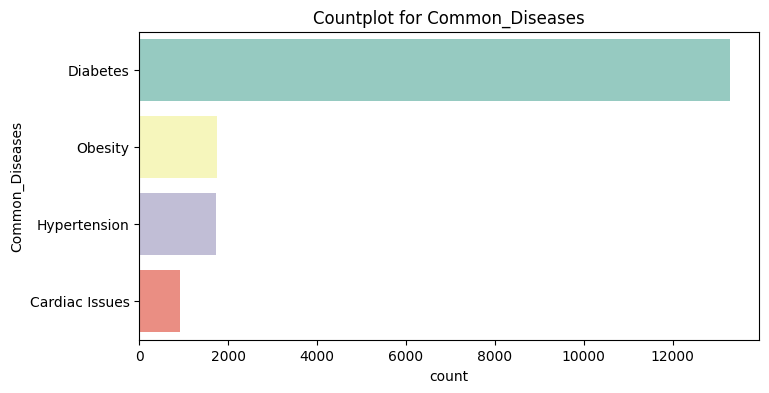

<ipython-input-32-dcf1bad2b0ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")


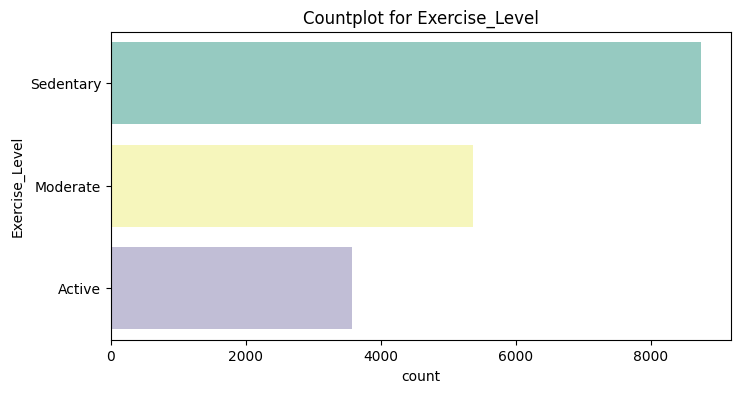

<ipython-input-32-dcf1bad2b0ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")


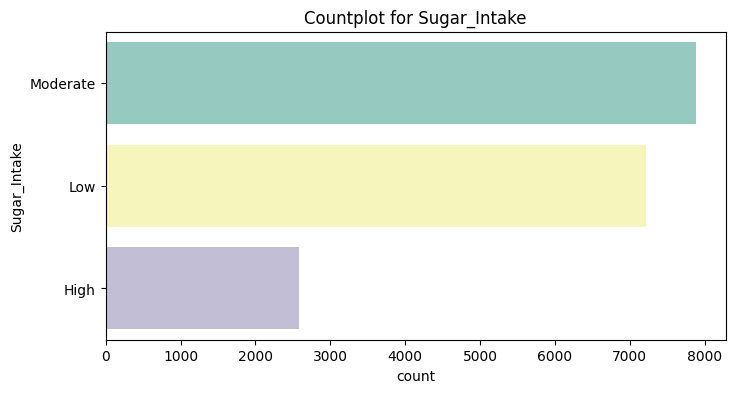

<ipython-input-32-dcf1bad2b0ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")


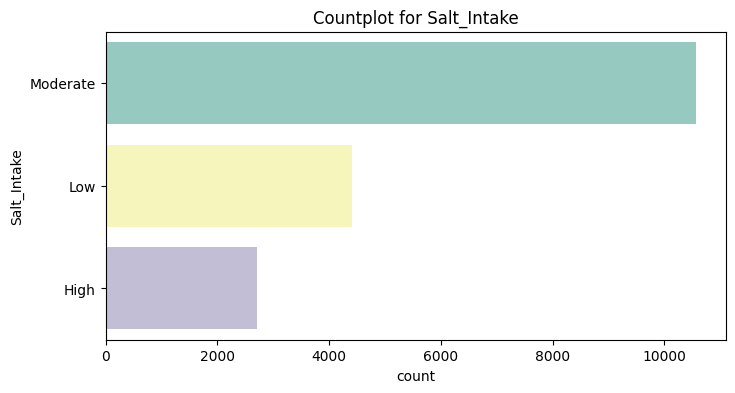

In [ ]:
# Countplots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette="Set3")
    plt.title(f'Countplot for {col}')
    plt.show()

<ipython-input-34-5c47a5178ca0>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=True, bins=30, palette="Set4")


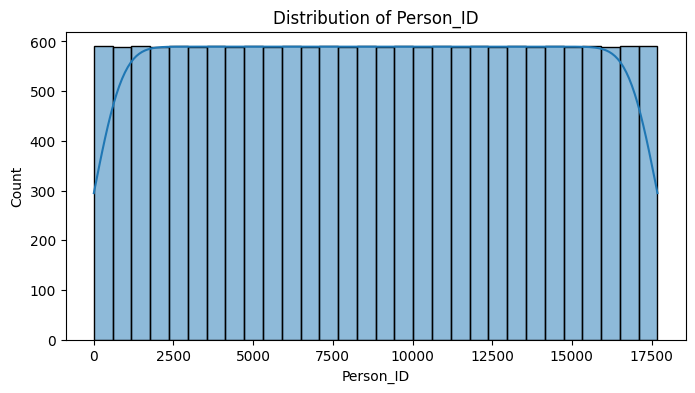

<ipython-input-34-5c47a5178ca0>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=True, bins=30, palette="Set4")


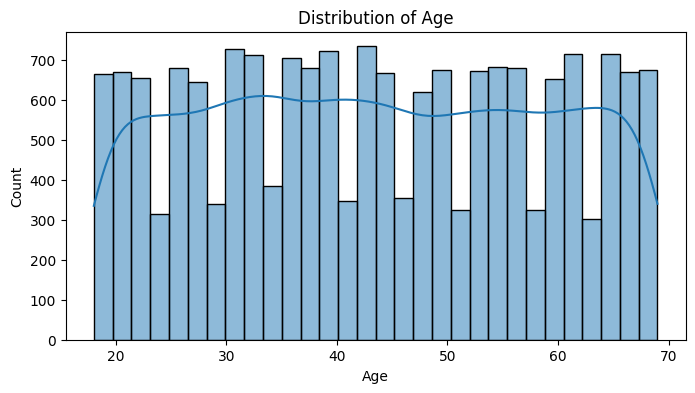

<ipython-input-34-5c47a5178ca0>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=True, bins=30, palette="Set4")


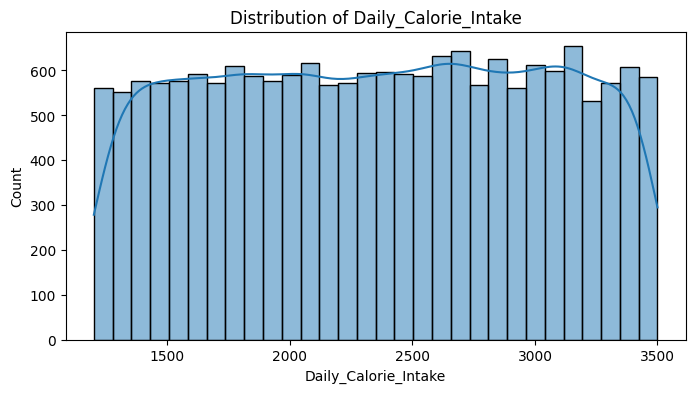

<ipython-input-34-5c47a5178ca0>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=True, bins=30, palette="Set4")


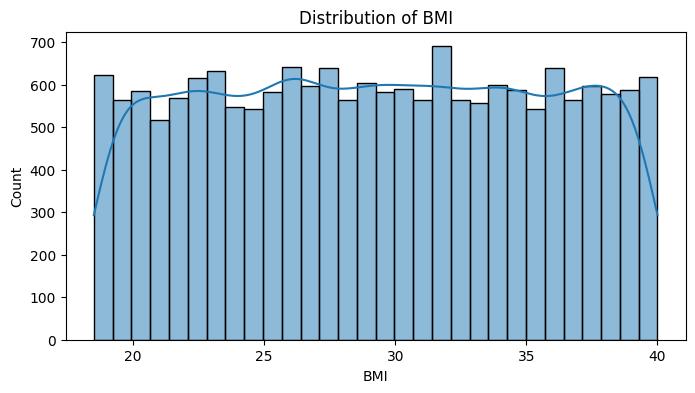

<ipython-input-34-5c47a5178ca0>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=True, bins=30, palette="Set4")


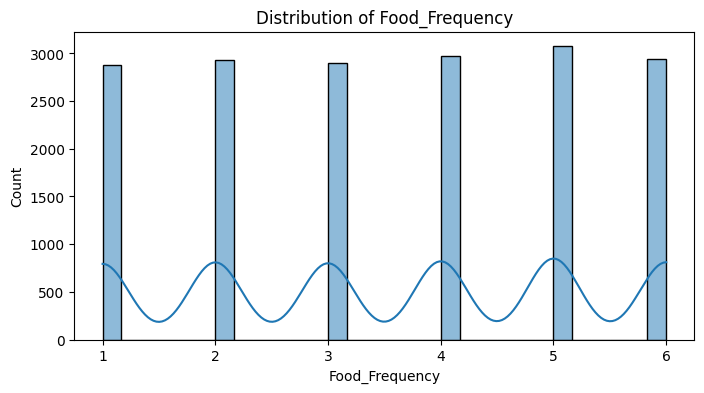

<ipython-input-34-5c47a5178ca0>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=True, bins=30, palette="Set4")


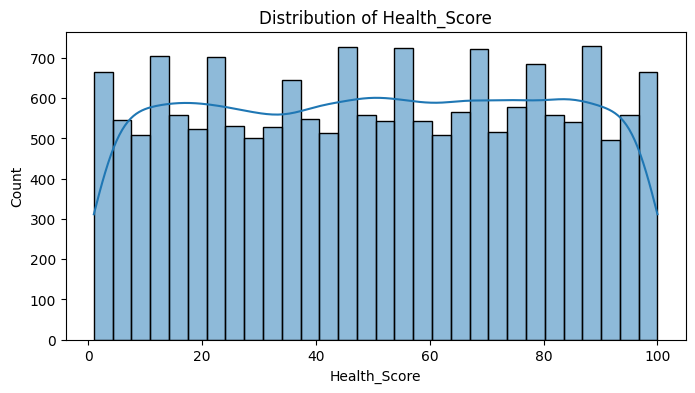

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, palette="Set4")
    plt.title(f'Distribution of {col}')
    plt.show()

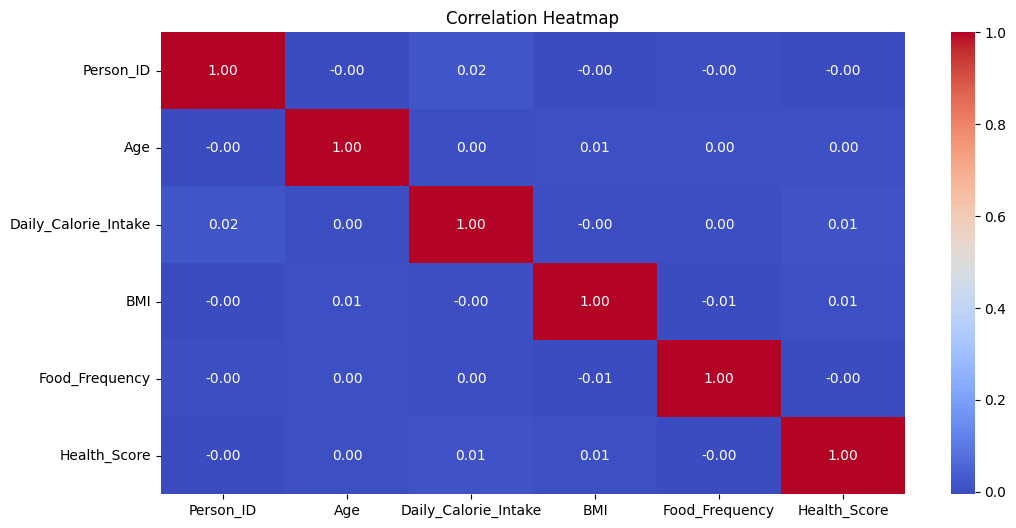

In [ ]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 6))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data[numerical_cols].corr()

,Person_ID,Age,Daily_Calorie_Intake,BMI,Food_Frequency,Health_Score
Person_ID,1.000000,-0.004683,0.017258,-0.002592,-0.000910,-0.002736
Age,-0.004683,1.000000,0.001248,0.006453,0.003629,0.004297
Daily_Calorie_Intake,0.017258,0.001248,1.000000,-0.001360,0.000574,0.013460
BMI,-0.002592,0.006453,-0.001360,1.000000,-0.005300,0.006396
Food_Frequency,-0.000910,0.003629,0.000574,-0.005300,1.000000,-0.001411
Health_Score,-0.002736,0.004297,0.013460,0.006396,-0.001411,1.000000


In [ ]:
# data = data.drop(['Person_ID'], axis='columns')
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

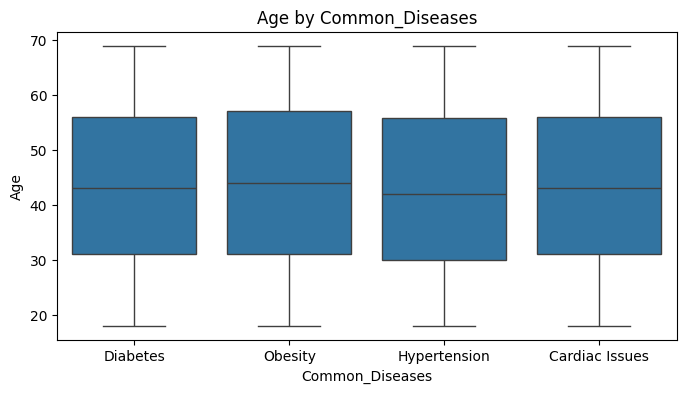

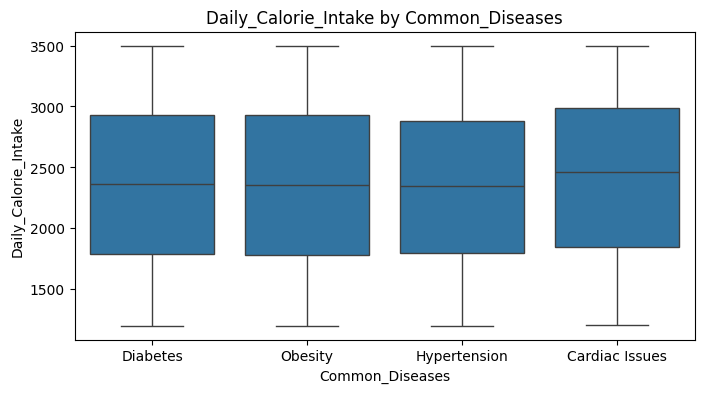

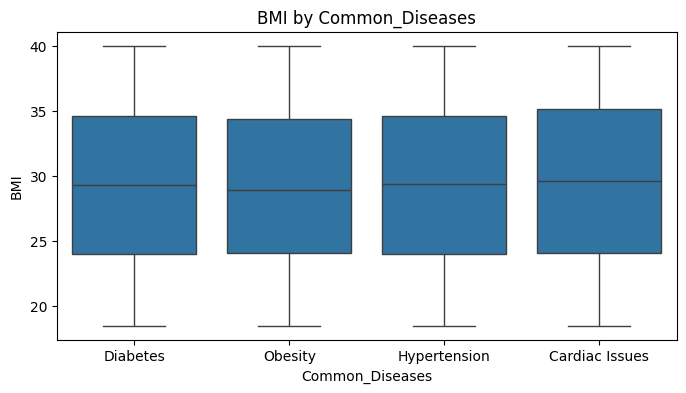

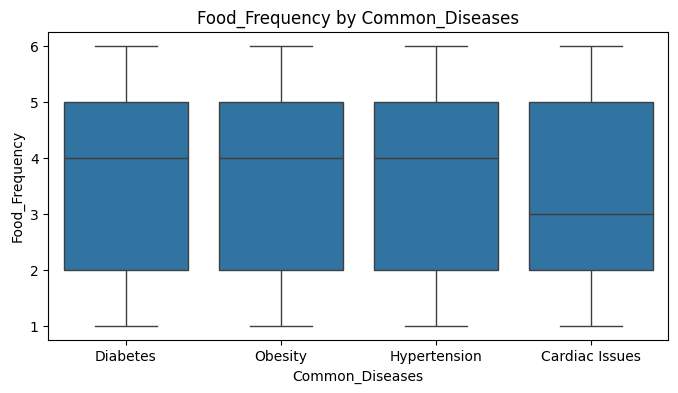

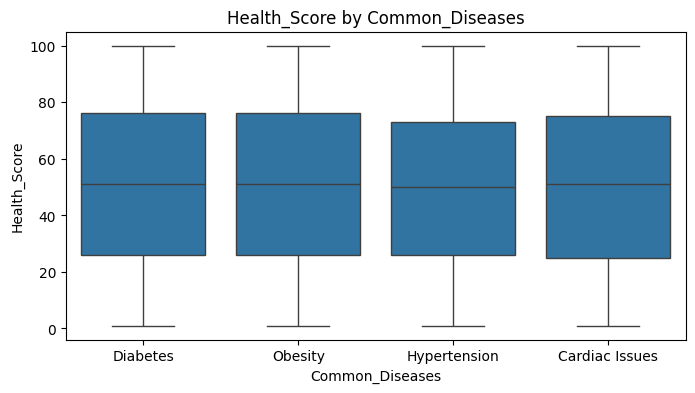

In [ ]:
# Boxplots for numerical columns grouped by a key categorical variable
key_categorical = 'Common_Diseases'  # Replace with the actual column name
if key_categorical in data.columns:
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[key_categorical], y=data[col])
        plt.title(f'{col} by {key_categorical}')
        plt.show()